# 宽基指数和行业分布

## 导入模块

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import feather
import os
from tqdm.notebook import tqdm
import sunlandsdatasdk as sd

## 读入股价跳跃数据和指数成分股

In [2]:
jump = pd.DataFrame(columns=['issue', 'date', 'jump', 'ret_jump'])
for year in [2019, 2020, 2021]:
    base_dir = f'../data/jump/{year}/'
    files = os.listdir(base_dir)
    for file in files:
        if not os.path.isdir(file):
            jump_daily = feather.read_dataframe(base_dir + file)
            if jump.empty:
                jump = jump_daily
            else:
                jump = pd.concat([jump, jump_daily])
jump = jump[jump['jump']]

In [3]:
jump['date'] = pd.to_datetime(jump['date'])
date_series = jump['date'].sort_values().unique()
jump['year_mon'] = jump['date'].dt.year * 100 + jump['date'].dt.month

In [4]:
# sd.auth('*', '*')
# hs800 = pd.DataFrame(columns=['issue', 'date'])
# hs1000 = pd.DataFrame(columns=['issue', 'date'])
# for date in tqdm(date_series):
#     hs800_daily = pd.DataFrame(columns=['issue', 'date'])
#     hs800_daily['issue'] = sd.get_index_stocks('000906', weight=False, date=date)
#     hs800_daily['date'] = date
#     if hs800.empty:
#         hs800 = hs800_daily.copy()
#     else:
#         hs800 = pd.concat([hs800, hs800_daily])
#     hs1000_daily = pd.DataFrame(columns=['issue', 'date'])
#     hs1000_daily['issue'] = sd.get_index_stocks('000852', weight=False, date=date)
#     hs1000_daily['date'] = date
#     if hs1000.empty:
#         hs1000 = hs1000_daily
#     else:
#         hs1000 = pd.concat([hs1000, hs1000_daily])
# os.makedirs('../data/indices/', exist_ok=True)
# feather.write_dataframe(hs800, '../data/indices/hs800.feather')
# feather.write_dataframe(hs1000, '../data/indices/hs1000.feather')

  0%|          | 0/730 [00:00<?, ?it/s]

In [5]:
hs800 = feather.read_dataframe('../data/indices/hs800.feather')
hs1000 = feather.read_dataframe('../data/indices/hs1000.feather')

## 宽基指数

In [6]:
jump_hs800 = pd.merge(
    jump,
    hs800,
    on=['issue', 'date'],
    how='inner'
)

jump_hs1000 = pd.merge(
    jump,
    hs1000,
    on=['issue', 'date'],
    how='inner'
)

### 跳跃数量统计

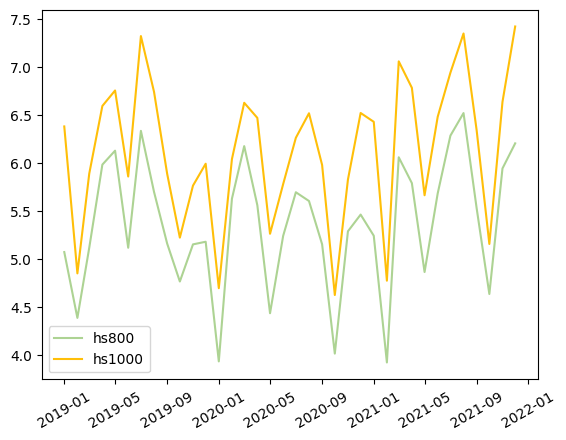

In [24]:
jump_count_800 = jump_hs800.groupby('year_mon')['jump'].count() / 800
jump_count_800 = jump_count_800.reset_index()
jump_count_800['date'] = jump_count_800['year_mon'] * 100 + 1
jump_count_800['date'] = pd.to_datetime(jump_count_800['date'], format='ISO8601')

jump_count_1000 = jump_hs1000.groupby('year_mon')['jump'].count() / 1000
jump_count_1000 = jump_count_1000.reset_index()
jump_count_1000['date'] = jump_count_1000['year_mon'] * 100 + 1
jump_count_1000['date'] = pd.to_datetime(jump_count_1000['date'], format='ISO8601')

plt.plot(jump_count_800['date'], jump_count_800['jump'], color='#add393', label='hs800')
plt.plot(jump_count_1000['date'], jump_count_1000['jump'], color='#ffbf09', label='hs1000')
plt.xticks(rotation=30)
plt.legend()
plt.show()

### 跳跃幅度统计

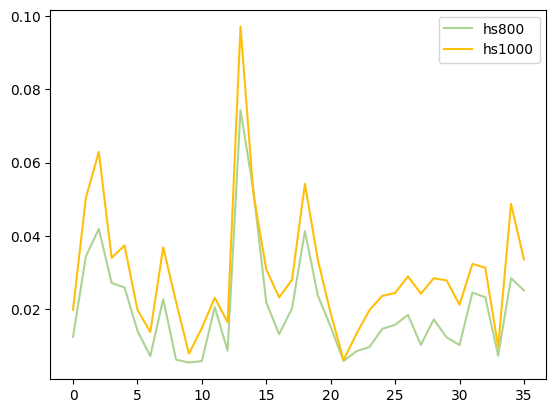

In [13]:
ret_jump_month_800 = jump_hs800.groupby(['issue', 'year_mon'])['ret_jump'].sum().reset_index()
ret_800 = ret_jump_month_800.groupby('year_mon')['ret_jump'].median()
jump_count_800 = jump_count_800.reset_index()
jump_count_800['date'] = jump_count_800['year_mon'] * 100 + 1
jump_count_800['date'] = pd.to_datetime(jump_count_800['date'], format='ISO8601')

ret_jump_month_1000 = jump_hs1000.groupby(['issue', 'year_mon'])['ret_jump'].sum().reset_index()
ret_1000 = ret_jump_month_1000.groupby('year_mon')['ret_jump'].median()
jump_count_1000 = jump_count_1000.reset_index()
jump_count_1000['date'] = jump_count_1000['year_mon'] * 100 + 1
jump_count_1000['date'] = pd.to_datetime(jump_count_1000['date'], format='ISO8601')

plt.plot(, ret_800['ret_jump'], color='#add393', label='hs800')
plt.plot(ret_1000['ret_jump'], color='#ffbf09', label='hs1000')
plt.legend()
plt.show()

## 行业分布